<a href="https://colab.research.google.com/github/jeffowino/ML-WORK/blob/main/WHATSAPP_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To analyze the sentiments of a WhatsApp chat, we need to collect data from WhatsApp. Most of you must be using this messaging app, so to collect data about your chat, simply follow the steps mentioned below:

For iPhone:
Open your chat with a person or a group
Just tap on the profile of the person or the group
You will see an option to export chat down below
For Android:
Open your chat with a person or a group 
Click on the three dots above 
Click on more
Click on the export chat

You will see an option to attach media while exporting your chat. For simplicity, it is best not to attach media. Finally, enter your email and you will find your WhatsApp chat in your inbox.

WhatsApp Chat Sentiment Analysis using Python
Now let’s start with the task of WhatsApp chat sentiment analysis with Python. I’ll start this task by defining some helper functions because the data we get from WhatsApp is not a dataset that is ready to be used for any kind of data science task. So, to prepare your data for the sentiment analysis task, just define all the functions as defined below: 

In [ ]:
import re
import pandas as pd
import numpy as np
!pip install emoji
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Extract Time
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = re.match(pattern, s)
    if result:
        return True
    return False

# Find Authors or Contacts
def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

# Finding Messages
def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

     |████████████████████████████████| 168 kB 5.1 MB/s 
  Created wheel for emoji: filename=emoji-1.6.0-py3-none-any.whl size=168256 sha256=eca3e58ce275ce57ff7a2b88e296a1f2e5846816883314ad8ac213aeaec8b39f
  Stored in directory: /root/.cache/pip/wheels/f7/d7/74/c720aaf345a042b0c2d74361873258c5e8649b7f11b2ccce49
Successfully built emoji


It doesn’t matter if you are using a group chat dataset or your conversation with one person. All the functions defined above will prepare your data for the task of sentiment analysis as well as for any data science task. Now here is how we can prepare the data we collected from WhatsApp by using the above functions:

In [ ]:
data = []
conversation = '/content/WhatsApp Chat with JENGA June 2020 Class.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

FileNotFoundError: ignored

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

Now here is how we can analyze the sentiments of WhatsApp chat using Python:

In [ ]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])

data = df.dropna()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Message"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Message"]]
print(data.head())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



        Date     Time           Author  ... Positive  Negative  Neutral
3 2020-06-04  9:22 PM     Jenga Alfred  ...    0.333       0.0    0.667
4 2020-06-04  9:24 PM  +254 721 292202  ...    0.492       0.0    0.508
5 2020-06-04  9:25 PM     Jenga Alfred  ...    0.545       0.0    0.455
6 2020-06-04  9:27 PM     Jenga Alfred  ...    0.379       0.0    0.621
7 2020-06-04  9:29 PM        Sam Jenga  ...    0.217       0.0    0.783

[5 rows x 7 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


So, the data I used indicates that most of the messages between me and the other person are neutral. Which means it’s neither positive nor negative.

Summary
So this is how we can perform the task of sentiment analysis of WhatsApp chat. WhatsApp is a great source of data for the task of sentiment analysis and every data science task based on natural language processing. I hope you liked this article on the task of WhatsApp chat sentiment analysis using Python. Feel free to ask your valuable questions in the comments section below.

NOW LETS US DO GENERAL WHATSAPP ANALYSIS OF CHATS

I hope you now have understood how to get your WhatsApp data for the task of WhatsApp chat analysis with Python. Now let’s start this task by importing the necessary Python libraries that we need for this task:

In [ ]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

The dataset we are using here requires a lot of preparation, so I suggest you take a look at the data you are using before starting this WhatsApp chat analysis task. As I have already walked through the dataset, so I’ll start by writing a few Python functions to prepare the data before importing it:

In [ ]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

Now let’s import the data and prepare it in a way that we can use it in a pandas DataFrame:

In [ ]:
data = []
conversation = '/content/WhatsApp Chat with JENGA June 2020 Class (1).txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

Our dataset is completely ready now for the task of WhatsApp chat analysis with Python. Now let’s have a look at the last 20 messages and some other insights from the data:

In [ ]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
print(df.tail(20))
print(df.info())
print(df.Author.unique())

          Date  ...                                            Message
738 2021-08-11  ...                                         Sorry prof
739 2021-08-11  ...  As such I will not make it for class. Absolute...
740 2021-08-11  ...  My phone has been out of charge as well for th...
741 2021-08-11  ...  I left a link in class to the time series foll...
742 2021-08-11  ...                                    Sorry for that🙏
743 2021-08-11  ...                                     Sorry for this
744 2021-08-11  ...                                     Sorry for this
745 2021-08-11  ...                          Quick recovery to him/her
746 2021-08-12  ...  Hello, an update from the instructor.  For *to...
747 2021-08-16  ...                                    <Media omitted>
748 2021-08-16  ...  Please remember to upload your final presentat...
749 2021-08-18  ...  Dear All, I want to thank you all for the proj...
750 2021-08-18  ...                      This is well noted. Thank you
751 20

Now let’s have a look at the total number of messages between this WhatsApp chat:

In [ ]:
total_messages = df.shape[0]
print(total_messages)

758


Now let’s have a look at the total number of media messages present in this chat:

In [ ]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

65


Now let’s extract the emojis present in between the chats and have a look at the emojis present in this chat:

In [ ]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X',text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)
    return emoji_list
df['emoji'] = df["Message"].apply(split_count)

emojis = sum(df['emoji'].str.len())
print(emojis)

0


Now let’s extract the URLs present in this chat and have a look at the final insights:

In [ ]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chats between Aman and Sapna")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared", emojis)
print("Number of Links Shared", links)

Chats between Aman and Sapna
Total Messages:  758
Number of Media Shared:  65
Number of Emojis Shared 0
Number of Links Shared 86


Now let’s prepare this data to get more insights to analyze all the messages sent in this chat in more detail:

In [ ]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["Dr. Lawrence Nderu","Dan Jenga", "Jenga Alfred","Dr kenagi","Mahehu Jenga","Jeff"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Average Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)

Stats of Dr. Lawrence Nderu -
Messages Sent 61
Average Words per message 20.42622950819672
Media Messages Sent 8
Emojis Sent 0
Links Sent 7
Stats of Dan Jenga -
Messages Sent 66
Average Words per message 10.151515151515152
Media Messages Sent 8
Emojis Sent 0
Links Sent 0
Stats of Jenga Alfred -
Messages Sent 145
Average Words per message 15.144827586206896
Media Messages Sent 18
Emojis Sent 0
Links Sent 6
Stats of Dr kenagi -
Messages Sent 28
Average Words per message 15.071428571428571
Media Messages Sent 2
Emojis Sent 0
Links Sent 0
Stats of Mahehu Jenga -
Messages Sent 110
Average Words per message 7.327272727272727
Media Messages Sent 4
Emojis Sent 0
Links Sent 1
Stats of Jeff -
Messages Sent 41
Average Words per message 8.341463414634147
Media Messages Sent 4
Emojis Sent 0
Links Sent 0


Now let’s prepare a visualization of the total emojis present in the chat and the type of emojis sent between the two people. It will help in understanding the relationship between both the people:

In [ ]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)

total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)
  
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Now let’s have a look at the most used words in this WhatsApp chat by visualizing a word cloud:

There are 58856 words in all the messages.


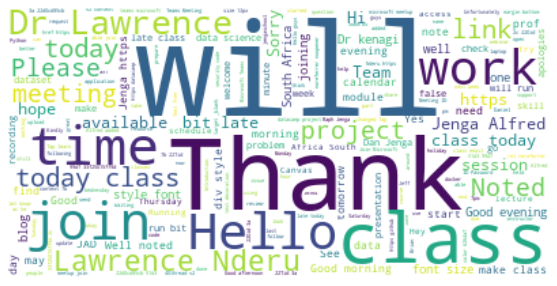

In [ ]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now let’s have a look at the most used words by each person by visualizing two different word clouds:

Author name Dr. Lawrence Nderu


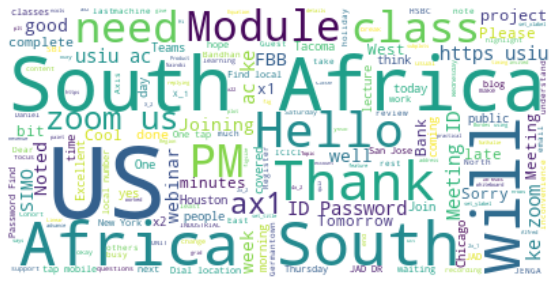

Author name Dan Jenga


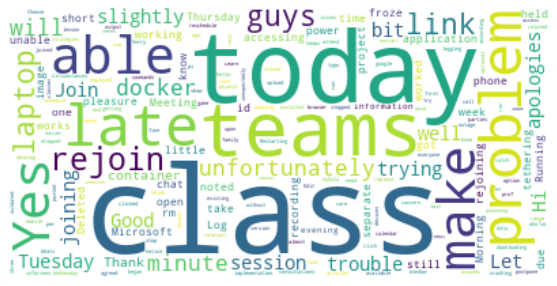

Author name Jenga Alfred


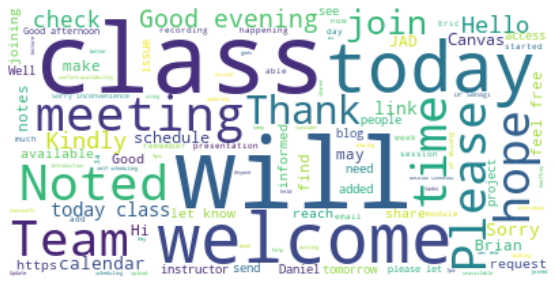

Author name Dr kenagi


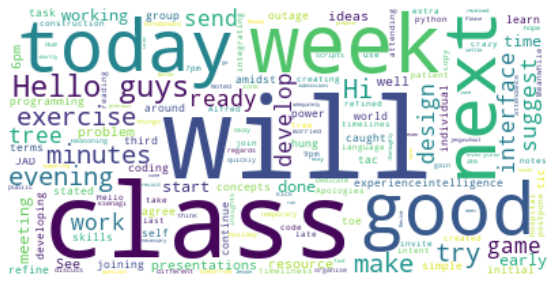

Author name Mahehu Jenga


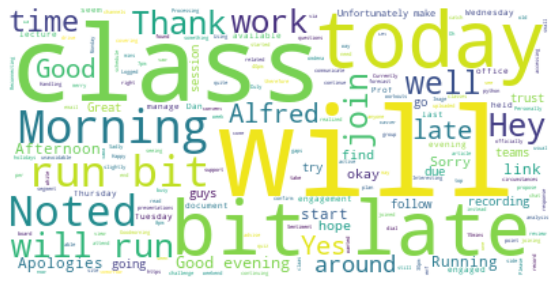

Author name Jeff


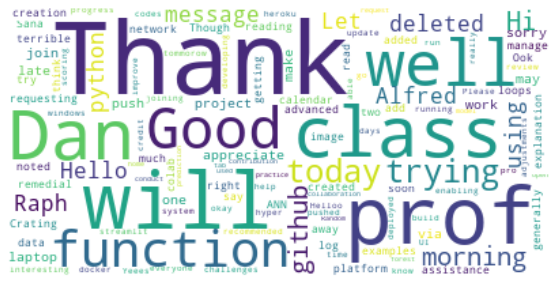

In [ ]:
l = ["Dr. Lawrence Nderu","Dan Jenga", "Jenga Alfred","Dr kenagi","Mahehu Jenga","Jeff"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

Summary
So this is how we can easily analyze any WhatsApp chat between you and your friend, customer, or even a group of people. You can further use this data for many other tasks of natural language processing. I hope you liked this article on the task of WhatsApp chat analysis with Python. Feel free to ask your valuable questions in the comments section below.